In [1]:
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# California Housing Prices
#### Based on data from 1990 California census

**Goal:** Learn from this data and predict median housing price in any district, given all other metrics.

**Framing the problem:** Supervised learning, multivariate regression, batch learning

**Performance measure:** $\text{RMSE}(\textbf{X},h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2}$

## Fetch Data

**[Note on six package:](https://stackoverflow.com/questions/34989206/what-does-from-six-moves-import-urllib-do-in-python)** `six` is a package that helps in writing code that is compatible with both Python 2 and Python 3. One of the problems developers face when writing code for Python2 and 3 is that the names of several modules from the standard library have changed, even though the functionality remains the same. The `six.moves` module provides those modules under a common name for both Python2 and 3 (mostly by providing the Python2 module under the name of the Python 3 module). So with `from six.moves import urllib`, imports `urllib` when run with Python3 and imports a mixture of `urllib`, `urllib2` and `urlparse` with Python2, mimicking the structure of Python3's `urllib`.

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) # Retrieve a URL into a temporary location on disk
    housing_tgz = tarfile.open(tgz_path) # Open a tar archive for reading, writing or appending
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
ls datasets/housing/

housing.csv  housing.tgz


## Load Data

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Take a Look at the Data Structure

In [5]:
housing.head()
housing.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Notice that ocean_proximity is type object (text)
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
%%bash
jt -l
jt -t chesterish
#jt -r # restore default theme (may need to delete browser cache after restoring)


Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


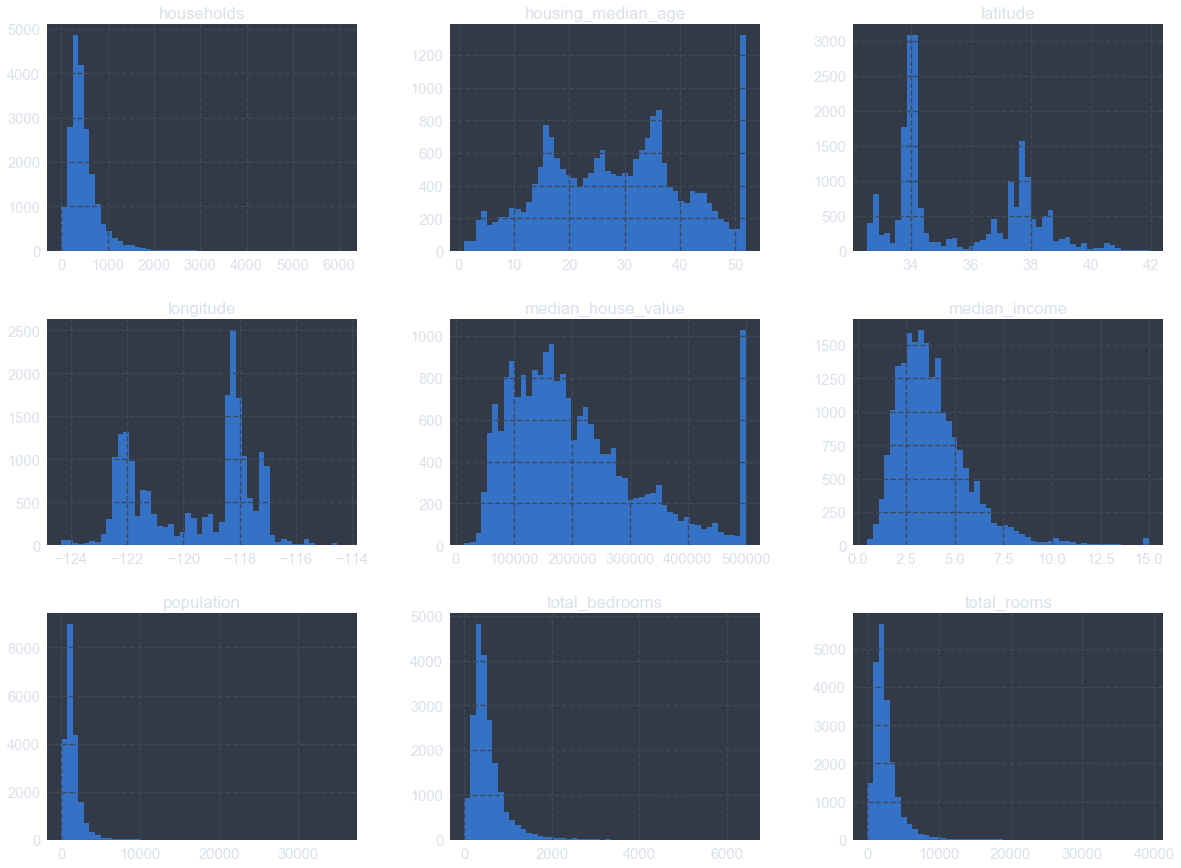

In [39]:


# import jtplot module in notebook
from jupyterthemes import jtplot
# reset default matplotlib rcParams
jtplot.reset()
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')
# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15)); # doesn't show categorical feature

Notes:

1. median income not expressed in USD
    - was scaled and capped at 0.4999, 15.0001
2. median age and median value (target) were also capped (notice spikes). Target being capped is a potential issue.
3. features have very different scales
4. many features are tail heavy which may cause problems with regression model (skewed data can lead to skewed residuals). Model may benefit from transformations that make data more normally distributed.

## Create Test Set
Do this right away to prevent data snooping bias (don't want to notice anything in test data that would lead to making decisions about the type of model to use, as this would lead to an overly optimistic generalization error).